There are theoretical/simulated bit error curves for AWGN channel

In [1]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from scipy import special as sp

In [2]:
def qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))
def approx_qfunc(x):
    return 0.5*np.exp(-0.5*(x**2))

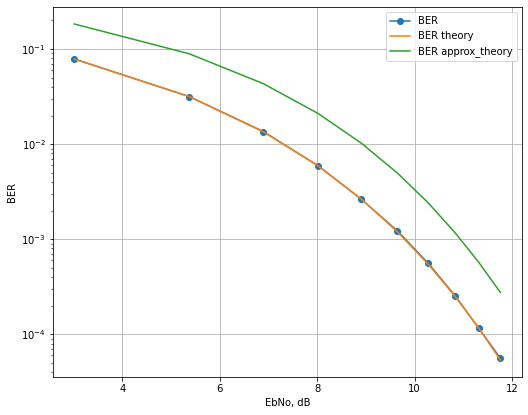

In [15]:
# Num of info bits
k = 5000;

# Generate data
info_bits = np.random.randint(0,2,k)

# BPSK modulation
modulated_bits = -2*info_bits+1

# Channel conditions
SNR = np.linspace(2,15,num=10)
sigma = np.sqrt(1/(SNR))

bit_err = np.zeros(np.size(sigma))
ITER_MAX = 1000
for i in range(np.size(sigma)):
    for iter in range(ITER_MAX):
        # Channel
        noise_vec = sigma[i] * numpy.random.randn(k);
        received_sig = modulated_bits + noise_vec
        
        # Receiver
        received_sig[received_sig >= 0] = 0
        received_sig[received_sig < 0] = 1

        bit_err[i] += np.sum((received_sig + info_bits) % 2) / k
    bit_err[i] /= ITER_MAX

# Theoretical BER calculation
theory_ber = qfunc(np.sqrt(SNR))

# Upper bound of BER
approx_theory_ber = approx_qfunc(np.sqrt(SNR))

# SNR in log scale
SNR_dB = 10*np.log10(SNR)

# Plot the results
plt.figure(figsize=(8.4, 6.8))
plt.semilogy(SNR_dB, bit_err, label = 'BER', marker = 'o')
plt.semilogy(SNR_dB, theory_ber, label = 'BER theory')
plt.semilogy(SNR_dB, approx_theory_ber, label = 'BER approx_theory')
plt.xlabel('EbNo, dB')
plt.ylabel('BER')
plt.grid()
plt.legend()
plt.show()